<a href="https://colab.research.google.com/github/RandaAlsubaie/ny/blob/main/Copy_of_CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [ ]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import tensorflow as tf
from keras import models, datasets

import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [ ]:
%pip install opendatasets --upgrade

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/tongpython/cat-and-dog')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: randa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


100%|██████████| 218M/218M [00:08<00:00, 27.0MB/s]


In [ ]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/cat-and-dog/training_set/training_set",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Using 1601 files for validation.


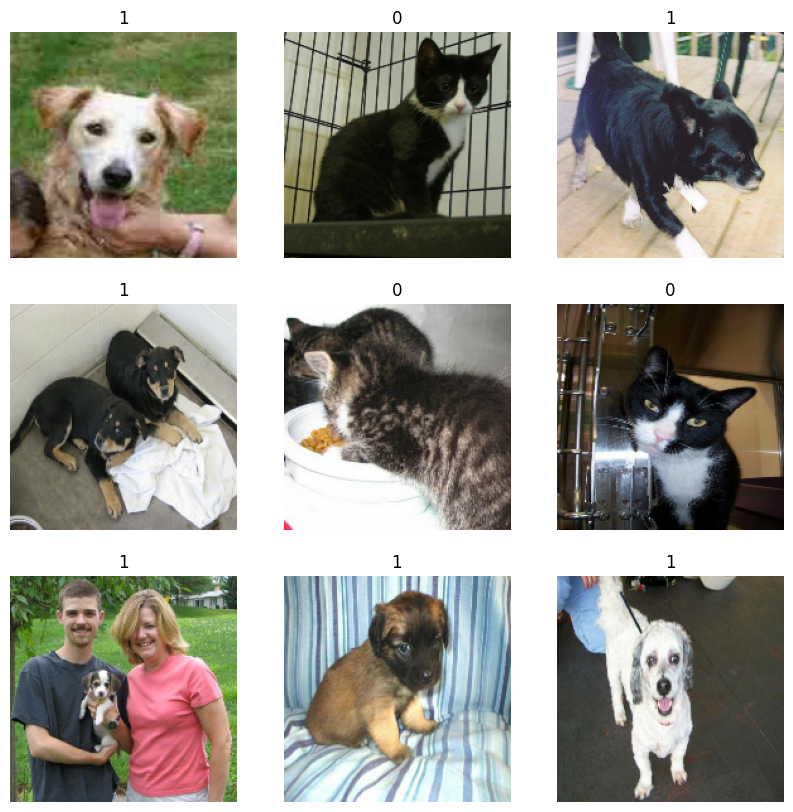

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images


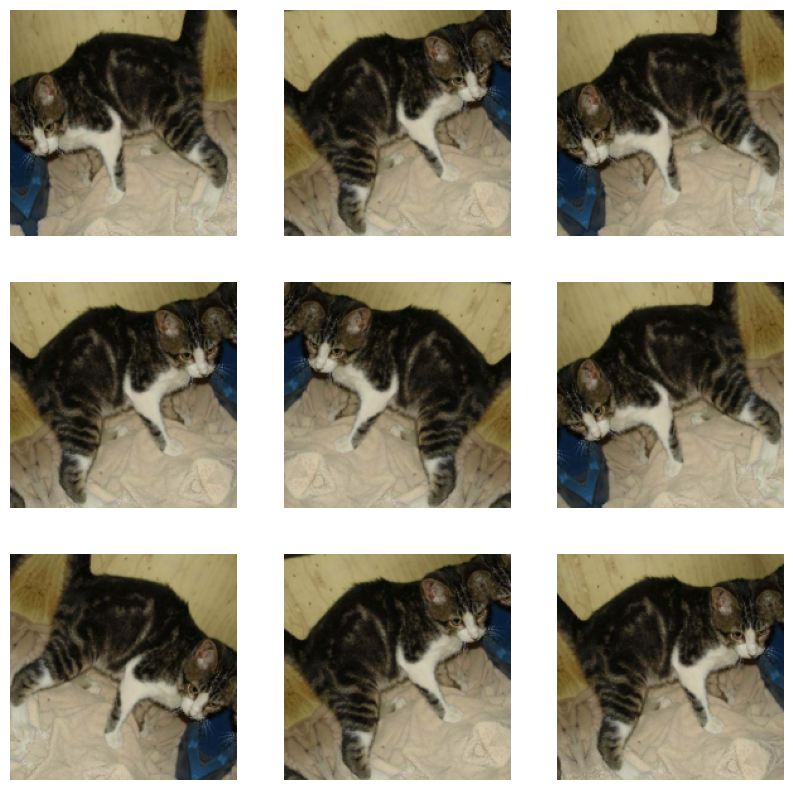

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [ ]:
model = models.Sequential([
                          layers.Flatten(input_shape=[180, 180,3]),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [ ]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 97200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │       1,555,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,555,361 (5.93 MB)

 Trainable params: 1,555,361 (5.93 MB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [ ]:
 model.fit(train_ds,  batch_size=1000, epochs=10, validation_data=(val_ds))

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.4856 - loss: 176.2338 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.4943 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.4909 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.4945 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.4897 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.4967 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy:

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [ ]:
model.evaluate(val_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5025 - loss: 0.6931


[0.6931515336036682, 0.497813880443573]

## Step 8: Save the Model
Finally, save your trained model for future use.

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - acc: 0.5095 - loss: 0.6931 - val_acc: 0.4978 - val_loss: 0.6932
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - acc: 0.5046 - loss: 0.6931 - val_acc: 0.4978 - val_loss: 0.6932
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - acc: 0.5094 - loss: 0.6931 - val_acc: 0.4978 - val_loss: 0.6932
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - acc: 0.5127 - loss: 0.6931 - val_acc: 0.4978 - val_loss: 0.6932
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - acc: 0.5046 - loss: 0.6931 - val_acc: 0.4978 - val_loss: 0.6932
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - acc: 0.5067 - loss: 0.6931 - val_acc: 0.4978 - val_loss: 0.6932
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - acc: 0.5027 - loss: 0.6932 - val_acc: 0.4978 - val_loss: 0.6932
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - acc: 0.5057 - loss: 0.6931 - val_acc: 0.4978 - val_loss: 0.6932
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - acc: 0.5